# A Handwritten Digits Classifier

Import modules

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Transforming the data to pandas dataframe

In [4]:
digits = load_digits()
digit_labels = pd.Series(digits['target'])
digit_data = pd.DataFrame(digits['data'])

Data Preview

In [5]:
digit_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [11]:
digit_data.shape

(1797, 64)

Reshaping the image for preview

In [12]:
img_1 = digit_data.iloc[0]
img_1.values

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
rshape = img_1.values.reshape(8,8)
rshape

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

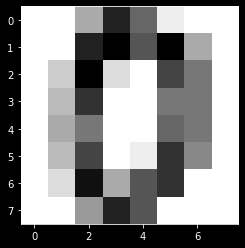

In [19]:
plt.imshow(rshape, cmap='gray_r')
plt.show()

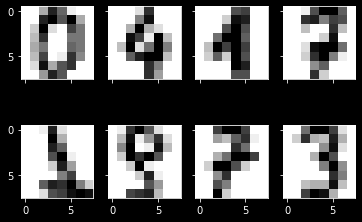

In [33]:
f, ax = plt.subplots(2, 4, sharey=True, sharex=True)
def imshw(x,y, img_row,):
    ax[x, y].imshow(digit_data.iloc[img_row].values.reshape(8,8), cmap='gray_r')
    
imshw(0, 0, 0)
imshw(0, 1, 100)
imshw(0, 2, 200)
imshw(0, 3, 300)

imshw(1, 0, 1000)
imshw(1, 1, 1100)
imshw(1, 2, 1200)
imshw(1, 3, 1300)

K-Nearest Neighbors Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Split up the data into train and test sets
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

# Function to test the model
def test(model, test_features, test_labels):
    pred = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['pred_label'] = pred
    overall_accuracy = sum(train_test_df["pred_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

# Function to perform cross validation
def cross_validate(k):
    accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(digit_data):
        train_features, test_features = digit_data.loc[train_index], digit_data.loc[test_index]
        train_labels, test_labels = digit_labels.loc[train_index], digit_labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        accuracies.append(overall_accuracy)
    return accuracies


0.9888728037614452

Experimenting for different value of k

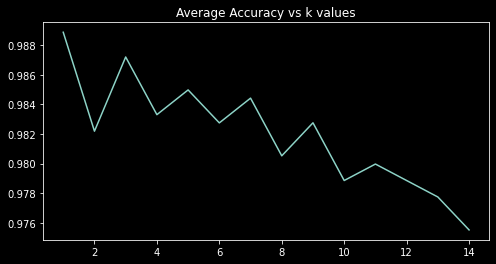

In [43]:
K_vals = list(range(1,15))
knn_accuracy = []

for k in K_vals:
    k_accuracy = cross_validate(k)
    k_avg_accuracy = np.mean(k_accuracy)
    knn_accuracy.append(k_avg_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Average Accuracy vs k values")
plt.plot(K_vals, knn_accuracy)
plt.show()

Neural Network with One Hidden Layer